In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_csv = pd.read_csv (r'myPortfolio.csv')

In [3]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df_csv.columns:
    print('{} : {}'.format(col,df_csv[col].unique()))

age : [29 24 23 27 21 28 22 25 26 30 20]
targetPrice : [ 190000000  200000000  290000000  130000000  140000000  260000000
  120000000  110000000  270000000  170000000  230000000  250000000
  300000000  210000000  240000000  160000000  220000000  180000000
  280000000  150000000  350000000  440000000  390000000  410000000
  460000000  370000000  480000000  490000000  380000000  340000000
  450000000  420000000  320000000  500000000  400000000  310000000
  430000000  330000000  470000000  510000000  930000000  960000000
  920000000  790000000  690000000 1030000000  860000000 1220000000
 1420000000 1180000000 1190000000 1010000000 1320000000 1170000000
  620000000 1110000000 1050000000  830000000 1250000000 1040000000
 1450000000 1430000000  800000000  580000000  880000000 1380000000
  610000000  680000000 1470000000  700000000 1000000000 1350000000
  810000000 1330000000  770000000 1390000000  570000000  840000000
  710000000  640000000 1460000000  870000000 1410000000 1400000000
 127000

In [4]:
# #replace 'commas'
# df_csv = df_csv.replace(",","", regex=True)
#change dtype to int32
df_csv = df_csv.astype('int32')
#check if dtype has been changed
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           599 non-null    int32
 1   targetPrice   599 non-null    int32
 2   targetPeriod  599 non-null    int32
 3   cash          599 non-null    int32
 4   stock         599 non-null    int32
 5   gold          599 non-null    int32
 6   bond          599 non-null    int32
 7   fund          599 non-null    int32
 8   realEstate    599 non-null    int32
dtypes: int32(9)
memory usage: 21.2 KB


In [5]:
#check null
df_csv.isnull().sum()

age             0
targetPrice     0
targetPeriod    0
cash            0
stock           0
gold            0
bond            0
fund            0
realEstate      0
dtype: int64

In [ ]:
#draw null location in data
sns.heatmap(df_csv.isnull(),cbar=False,cmap='viridis')

In [ ]:
#fill in empty or NA rows
num_col = ['income', 'age',  'card type', 'usage']
for col in num_col:
    df_csv[col]=pd.to_numeric(df_csv[col])
    df_csv[col].fillna(df_csv[col].mean(), inplace=True)
df_csv.isnull().sum()

<AxesSubplot:>

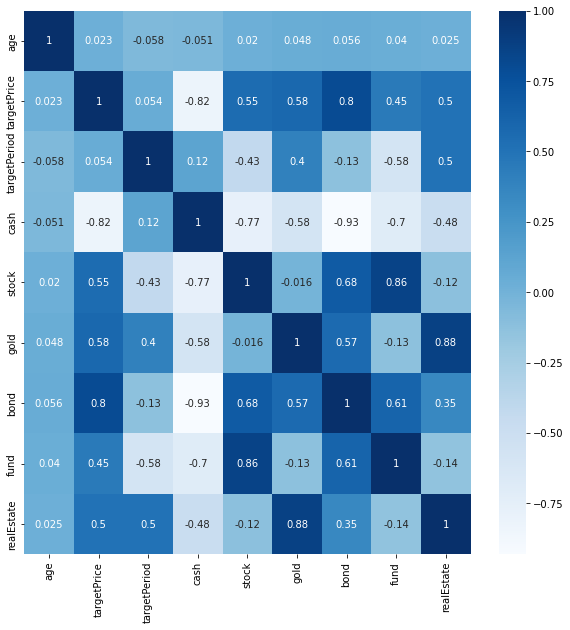

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df_csv.corr(),cbar=True,annot=True,cmap='Blues')

<AxesSubplot:xlabel='age', ylabel='Count'>

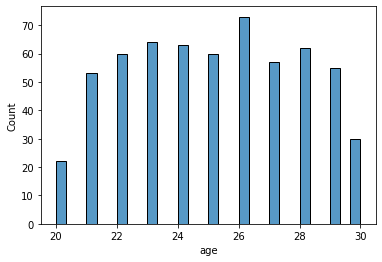

In [8]:
sns.histplot(df_csv.age,bins=30)

Text(0, 0.5, 'fund')

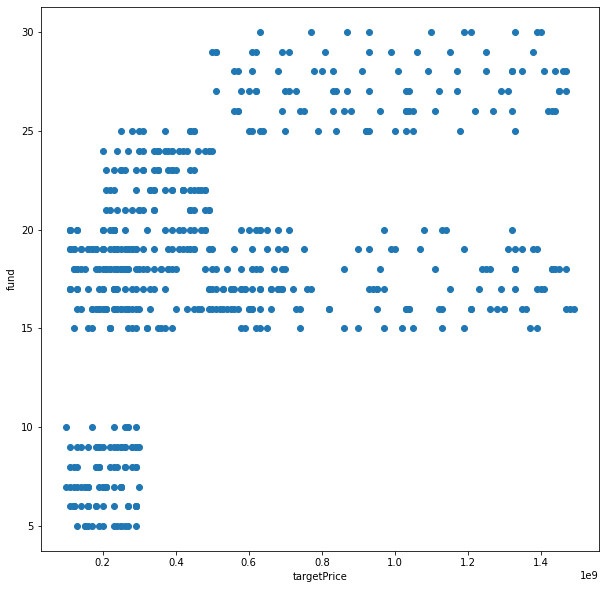

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(x='targetPrice',y='fund',data=df_csv)
plt.xlabel('targetPrice')
plt.ylabel('fund')

Text(0, 0.5, 'fund')

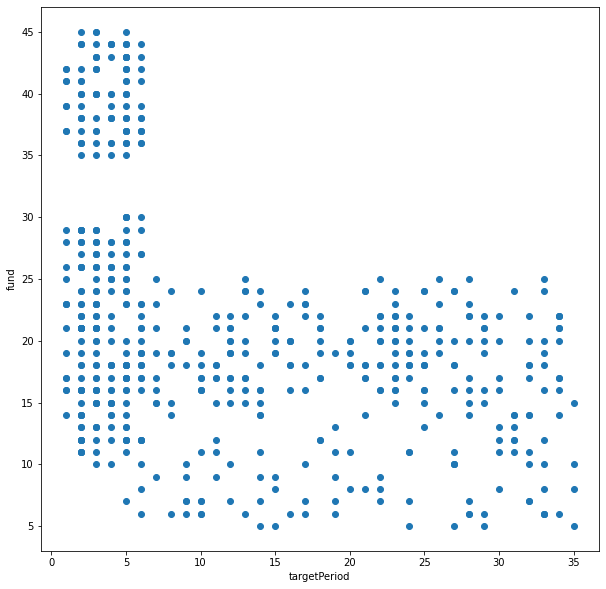

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(x='targetPeriod',y='stock',data=df_csv)
plt.xlabel('targetPeriod')
plt.ylabel('fund')

In [ ]:
sns.boxplot(x='age',y='usage',data=df_csv)

In [ ]:
sns.boxplot(x='income',y='usage',data=df_csv)

In [ ]:
ageGroup20 = df_csv.loc[(df_csv['age'] == 20),
                    "usage"]
ageGroup30 = df_csv.loc[(df_csv['age'] == 30),
                    "usage"]
ageGroup40 = df_csv.loc[(df_csv['age'] == 40),
                    "usage"]
ageGroup50 = df_csv.loc[(df_csv['age'] == 50),
                    "usage"]
ageGroup60 = df_csv.loc[(df_csv['age'] == 60),
                    "usage"]

In [ ]:
a20m = ageGroup20.mean()
print("Age group 20 mean:",a20m)

print("\nAge group 20 describe:")
print(ageGroup20.describe())

quantile75 = ageGroup20.quantile(0.75)
print("\nAge group 20, 75th quantile:",quantile75)

print("\nAge group 20 histogram:")
hist = ageGroup20.hist(bins=6)



In [14]:
from sklearn.cluster import KMeans

In [83]:
X = df_csv[["age", "targetPrice", "targetPeriod"]].values.astype('int32')
# X = df_csv[["income", "age", "usage"]].values.astype('int32')

In [84]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(n_clusters=6)

In [85]:
y_kmeans = kmeans.predict(X)

In [86]:
y_kmeans

array([5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5, 5, 3, 3, 5, 3, 3, 5,
       5, 5, 3, 3, 5, 3, 5, 5, 3, 5, 3, 5, 5, 3, 5, 5, 5, 3, 5, 5, 3, 3,
       3, 5, 3, 3, 3, 3, 5, 5, 3, 5, 5, 5, 5, 3, 5, 5, 5, 5, 3, 5, 5, 3,
       3, 3, 3, 5, 5, 5, 5, 3, 5, 5, 3, 5, 5, 3, 5, 3, 5, 5, 3, 5, 3, 3,
       3, 3, 5, 5, 3, 3, 3, 5, 3, 3, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 5,
       1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 1, 1, 1, 1, 1,
       1, 5, 3, 5, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1,
       3, 1, 0, 0, 0, 4, 4, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 4, 4, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 2, 4, 4, 0, 4, 2, 4, 4, 2, 2, 4, 0, 0, 2, 0, 2,
       0, 4, 2, 2, 4, 2, 4, 0, 4, 0, 4, 2, 0, 2, 2, 2, 4, 2, 1, 1, 4, 0,
       2, 2, 4, 4, 0, 4, 2, 1, 0, 0, 4, 2, 0, 0, 0, 4, 4, 2, 0, 0, 0, 2,
       4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 2, 4, 4, 5, 5,

In [87]:
df_y = pd.DataFrame(y_kmeans, columns = {"cluster"})

In [88]:
df_y

,cluster
0,5
1,5
2,3
3,5
4,5
...,...
594,2
595,0
596,4
597,2


In [89]:
df_csv["cluster"] = df_y["cluster"]

In [90]:
display(df_csv)

,age,targetPrice,targetPeriod,cash,stock,gold,bond,fund,realEstate,cluster
0,29,190000000,5,68,12,0,0,17,3,5
1,24,200000000,2,68,12,0,0,20,0,5
2,23,290000000,6,62,18,0,0,15,5,3
3,27,190000000,5,68,12,0,0,16,4,5
4,29,130000000,2,69,11,0,0,16,4,5
...,...,...,...,...,...,...,...,...,...,...
594,29,1430000000,21,8,17,12,23,18,22,2
595,21,1020000000,12,8,17,15,20,15,25,0
596,28,710000000,11,7,18,10,25,20,20,4
597,22,1330000000,15,4,21,12,23,18,22,2


In [119]:
#extract each cluster cost
array = {}
for x in range(6):
    temp = {}
    cnt = 0
    for div in ["cash", "stock", "gold", "bond", "fund", "realEstate"]:
        temp_cluster_info = df_csv.loc[(df_csv['cluster'] == x), div]
        temp[div] = temp_cluster_info.quantile(0.75)
        cnt += temp_cluster_info.quantile(0.75)
    print(cnt)
    for key in temp:
        temp[key] = round(temp[key] / cnt * 100)
    array[x] = temp
    
print(array)

133.0
124.0
132.5
133.0
160.0
119.0
{0: {'cash': 5, 'stock': 30, 'gold': 10, 'bond': 17, 'fund': 20, 'realEstate': 17}, 1: {'cash': 36, 'stock': 21, 'gold': 3, 'bond': 11, 'fund': 19, 'realEstate': 10}, 2: {'cash': 6, 'stock': 29, 'gold': 10, 'bond': 17, 'fund': 20, 'realEstate': 17}, 3: {'cash': 53, 'stock': 17, 'gold': 2, 'bond': 8, 'fund': 16, 'realEstate': 4}, 4: {'cash': 28, 'stock': 23, 'gold': 7, 'bond': 14, 'fund': 16, 'realEstate': 13}, 5: {'cash': 64, 'stock': 13, 'gold': 3, 'bond': 2, 'fund': 15, 'realEstate': 3}}


In [115]:
x = [[27, 500_000_000, 10]]
cluster_result = kmeans.predict(x)

In [116]:
cluster_result[0]

1

In [106]:
c0m = cluster0.mean()
print("cluster 0 mean:",c0m)

print("\ncluster 0 describe:")
print(cluster0.describe())

quantile75 = cluster0.quantile(0.75)
print("\ncluster 0, 75th quantile:",quantile75)

print("\ncluster 0 histogram:")
hist = cluster0.hist(bins=6)

NameError: name 'cluster0' is not defined

In [ ]:
c1m = cluster1.mean()
print("cluster 1 mean:",c1m)

print("\ncluster 1 describe:")
print(cluster1.describe())

quantile75 = cluster1.quantile(0.75)
print("\ncluster 1, 75th quantile:",quantile75)

print("\ncluster 1 histogram:")
hist = cluster1.hist(bins=6)

In [98]:
from sklearn import svm

In [99]:
#classify 목표(target 또는 y) class/레이블 따로 정리
y = df_csv['cash'].values.astype(np.int)

c:\users\hdp05\onedrive\desktop\git\push\project\paldo_be_portfolio\ai\venv\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [101]:
X = df_csv[["age", "targetPrice", "targetPeriod", "cash"]].values.astype('int32')

In [102]:
print(y)
print(X)

[68 68 62 68 69 65 64 67 64 67 61 62 63 65 62 62 69 68 69 68 67 68 61 68
 63 68 62 63 64 65 67 68 64 68 64 64 68 62 65 68 63 66 64 63 62 62 64 64
 67 62 63 63 69 68 62 68 67 66 70 61 66 64 64 66 65 62 62 66 64 61 65 61
 67 68 65 62 63 63 70 61 65 69 61 66 62 66 65 66 62 64 67 63 64 65 60 64
 64 70 63 39 31 37 39 36 34 35 32 40 33 35 39 39 31 34 40 33 30 31 31 36
 34 39 31 31 38 38 31 32 40 34 39 39 34 39 37 39 37 30 40 34 30 38 33 35
 38 36 34 39 35 30 37 32 37 32 34 37 37 32 36 37 39 32 39 34 32 35 31 39
 34 36 37 31 33 34 35 37 39 32 33 32 37 32 34 33 32 37 35 36 31 38 33 32
 30 33 38 39 31 37 34 10  8  6  1  3  0  7  7  2  1  8  7  3  2  8  1 10
  8  5  2  1  5  9  3  5  1  9  7  0  8  7  3  6  3  3  7  5  0  9  2  5
  1  6  1  1  0  2  9  4  8  4  2  7  7  9  5  9  5  3  7  8  6  2  3  6
  5  9  4  8  4  1  2  4  7  9  8  5  7  3  5  1  9  5  6  3  1  8  1 10
  4  9  8  2  5  4 10  7  9  8  2 74 71 74 75 79 78 72 78 80 75 79 74 70
 70 72 76 78 75 73 74 71 79 74 80 79 75 71 75 79 73

In [103]:
regr=svm.SVR()

In [104]:
regr.fit(X,y)

SVR()

In [105]:
regr.predict([[2367898, 25, 3]])

ValueError: X has 3 features, but SVR is expecting 4 features as input.